# **EDA Project**
EDA -CSE3040\
Submitted by
> Saptharishee M\
  20MIA1150

> Chenchu  Aravind  V\
20MIA1126

>Sarveswaran\
20MIA1128

>Shiva Sindhu Perla\
20MIA1104


Visit our googlesite : [EDA-Suicide in India](https://sites.google.com/view/exploratory-data-analytics/home?authuser=0)



<h1>Motivation</h1> <br>
Each suicide is a personal tragedy that prematurely takes the life of an individual and has a continuing ripple effect, affecting the lives of families, friends and communities. Every year, more than 1,00,000 people commit suicide in our country. There are various causes of suicides like professional/career problems, sense of isolation, abuse, violence, family problems, mental disorders, addiction to alcohol, financial loss, chronic pain etc.

ADSI 2020 (Accidental Deaths & Suicides in India 2020) states that there was 10% increase in suicide rates that is on an average more than 17 died because of suicide every single hour. Reports suggested that covid-19 pandemic has increased the number of suicide so we decided to investigate the reason behind suicide on a normal year. We found State/UT-wise professional profile of suicide victim during 2001-2012 dataset from datagov.in .

<h1>Abstract</h1> <br>
Problem uses a government provided real dataset of Suicide between 2001 to 2012 and analyses the cause based on gender, age-group, location of the person (in India). Apart from causes were there any other similarities of between the data? What is the major cause of suicide? which group of people died of suicide more? It also tries to get a visual idea and inference about the data. The aim of the project is to find the major reason of suicide and accidental death that happened a decade ago.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Dataset that we use is taken from [datagov.in](https://data.gov.in/).Tittle of the dataset is "[State/UT-wise professional profile of suicide victim during 2001-2012](https://data.gov.in/resources/stateut-wise-professional-profile-suicide-victim-during-2001-2012)".

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/EDA Dataset/Final_dataset.csv',index_col="CAUSE")
#dataset is read using pandas framework

In [ ]:
data

,STATE/UT,Year,Male upto 14 years,Male 15-29 years,Male 30-44 years,Male 45-59 years,Male 60 years and above,Total Male,Female upto 14 years,Female 15-29 years,Female 30-44 years,Female 45-59 years,Female 60 years and above,Total Female,Grand Total
CAUSE,,,,,,,,,,,,,,,
House Wife,ANDHRA PRADESH,2001,0,0,0,0,0,0,0,1132,811,397,104,2444,2444
Service (Government),ANDHRA PRADESH,2001,0,34,57,44,0,135,0,23,22,9,7,61,196
Service (Private),ANDHRA PRADESH,2001,1,250,275,138,10,674,5,43,24,28,6,106,780
Public Sector Undertaking,ANDHRA PRADESH,2001,0,32,36,29,13,110,0,4,5,1,0,10,120
Student,ANDHRA PRADESH,2001,56,202,19,18,0,295,46,115,5,9,0,175,470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Retired Person,TOTAL (ALL INDIA),2012,0,9,19,184,520,732,5,9,2,14,71,101,833
Others (Please Specify),TOTAL (ALL INDIA),2012,307,4013,5696,3525,1926,15467,289,1966,1258,856,618,4987,20454
Total,TOTAL (ALL INDIA),2012,1120,23398,28486,19197,7572,79773,1194,18395,12129,6207,2790,40715,120488


We found few part of data that can mislead the analysis so we figured out what are those rows and tried to seperate it


In [ ]:
totalSeperated=data.loc['Total'].reset_index()
totalSalaried=data.loc['Total Salaried'].reset_index()
TotalSelfEmployed=data.loc['Total Self-employed'].reset_index()

In [ ]:
totalSeperated

,CAUSE,STATE/UT,Year,Male upto 14 years,Male 15-29 years,Male 30-44 years,Male 45-59 years,Male 60 years and above,Total Male,Female upto 14 years,Female 15-29 years,Female 30-44 years,Female 45-59 years,Female 60 years and above,Total Female,Grand Total
0,Total,ANDHRA PRADESH,2001,173,2058,2213,1566,369,6379,185,1871,1198,697,192,4143,10522
1,Total,ANDHRA PRADESH,2002,101,2173,2831,1935,531,7571,139,1804,1374,572,233,4122,11693
2,Total,ANDHRA PRADESH,2003,155,2270,2846,1745,497,7513,197,1685,1204,609,201,3896,11409
3,Total,ANDHRA PRADESH,2004,95,2562,3448,2175,802,9082,142,1959,1344,689,310,4444,13526
4,Total,ANDHRA PRADESH,2005,143,2444,3178,2156,944,8865,161,1904,1360,733,419,4577,13442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,Total,TOTAL (ALL INDIA),2008,1165,24396,29519,18819,6645,80544,1216,20256,14043,6373,2585,44473,125017
452,Total,TOTAL (ALL INDIA),2009,1501,23746,29335,19596,7293,81471,1450,20174,14153,7007,2896,45680,127151
453,Total,TOTAL (ALL INDIA),2010,1640,26387,30444,20768,7941,87180,1490,21238,14402,7121,3168,47419,134599
454,Total,TOTAL (ALL INDIA),2011,1574,26604,31400,20507,7754,87839,1461,21410,14815,7029,3031,47746,135585


In [ ]:
totalSalaried

,CAUSE,STATE/UT,Year,Male upto 14 years,Male 15-29 years,Male 30-44 years,Male 45-59 years,Male 60 years and above,Total Male,Female upto 14 years,Female 15-29 years,Female 30-44 years,Female 45-59 years,Female 60 years and above,Total Female,Grand Total
0,Total Salaried,ANDHRA PRADESH,2001,1,316,368,211,23,919,5,70,51,38,13,177,1096
1,Total Salaried,ANDHRA PRADESH,2002,0,299,351,196,10,856,0,64,47,23,8,142,998
2,Total Salaried,ANDHRA PRADESH,2003,2,186,298,219,35,740,2,63,85,36,8,194,934
3,Total Salaried,ANDHRA PRADESH,2004,4,275,441,232,30,982,0,44,60,13,0,117,1099
4,Total Salaried,ANDHRA PRADESH,2005,2,265,438,298,39,1042,0,80,99,21,5,205,1247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,Total Salaried,TOTAL (ALL INDIA),2008,11,3525,5496,3512,458,13002,11,1352,814,402,97,2676,15678
452,Total Salaried,TOTAL (ALL INDIA),2009,3,3771,5510,3211,549,13044,3,1052,766,400,83,2304,15348
453,Total Salaried,TOTAL (ALL INDIA),2010,32,3857,5290,3274,439,12892,10,1150,815,319,58,2352,15244
454,Total Salaried,TOTAL (ALL INDIA),2011,15,3820,5375,3251,450,12911,9,1175,949,365,73,2571,15482


In [ ]:
TotalSelfEmployed

,CAUSE,STATE/UT,Year,Male upto 14 years,Male 15-29 years,Male 30-44 years,Male 45-59 years,Male 60 years and above,Total Male,Female upto 14 years,Female 15-29 years,Female 30-44 years,Female 45-59 years,Female 60 years and above,Total Female,Grand Total
0,Total Self-employed,ANDHRA PRADESH,2001,83,906,1218,835,194,3236,75,323,226,137,38,799,4035
1,Total Self-employed,ANDHRA PRADESH,2002,35,956,1412,1099,351,3853,19,194,309,168,72,762,4615
2,Total Self-employed,ANDHRA PRADESH,2003,26,849,1478,942,330,3625,47,234,298,183,46,808,4433
3,Total Self-employed,ANDHRA PRADESH,2004,13,1250,1885,1332,446,4926,35,349,278,206,95,963,5889
4,Total Self-employed,ANDHRA PRADESH,2005,33,1113,1537,1121,526,4330,46,414,351,185,98,1094,5424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,Total Self-employed,TOTAL (ALL INDIA),2008,255,11264,16225,10533,3943,42220,206,3148,2327,1242,555,7478,49698
452,Total Self-employed,TOTAL (ALL INDIA),2009,307,10694,15914,11337,4085,42337,326,3122,2768,1512,554,8282,50619
453,Total Self-employed,TOTAL (ALL INDIA),2010,378,12405,16854,11751,4409,45797,302,3723,3037,1748,722,9532,55329
454,Total Self-employed,TOTAL (ALL INDIA),2011,263,11426,16053,11108,4350,43200,302,3348,2795,1654,602,8701,51901


In [ ]:
#Removing three rows from CAUSE column
dropRow=data.drop(['Total','Total Salaried','Total Self-employed'])

In [ ]:
#reseting CAUSE column
index_reset=dropRow.reset_index()

In [ ]:
#Making STATE/UT column as index column

setIndex=index_reset.set_index('STATE/UT')


In [ ]:
setIndex

,CAUSE,Year,Male upto 14 years,Male 15-29 years,Male 30-44 years,Male 45-59 years,Male 60 years and above,Total Male,Female upto 14 years,Female 15-29 years,Female 30-44 years,Female 45-59 years,Female 60 years and above,Total Female,Grand Total
STATE/UT,,,,,,,,,,,,,,,
ANDHRA PRADESH,House Wife,2001,0,0,0,0,0,0,0,1132,811,397,104,2444,2444
ANDHRA PRADESH,Service (Government),2001,0,34,57,44,0,135,0,23,22,9,7,61,196
ANDHRA PRADESH,Service (Private),2001,1,250,275,138,10,674,5,43,24,28,6,106,780
ANDHRA PRADESH,Public Sector Undertaking,2001,0,32,36,29,13,110,0,4,5,1,0,10,120
ANDHRA PRADESH,Student,2001,56,202,19,18,0,295,46,115,5,9,0,175,470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TOTAL (ALL INDIA),Professional Activity,2012,7,856,1217,835,229,3144,1,136,116,46,13,312,3456
TOTAL (ALL INDIA),Farming/Agriculture Activity,2012,6,2624,4374,3456,1491,11951,18,607,674,356,148,1803,13754
TOTAL (ALL INDIA),Others (Please Specify),2012,194,5316,7079,4819,2010,19418,211,1803,1240,737,342,4333,23751


In [ ]:
print(data["STATE/UT"].value_counts())
"""While examining the unique value of colums of dataset we found that rows with data in "State/UT"
column like "TOTAL (UTs),TOTAL (ALL INDIA),TOTAL (STATES)" were actually the sum of other rows inorder
 to make a clear analysis we seprated it """


ANDHRA PRADESH       180
TOTAL (STATES)       180
RAJASTHAN            180
SIKKIM               180
TAMIL NADU           180
TRIPURA              180
UTTAR PRADESH        180
UTTARAKHAND          180
WEST BENGAL          180
A & N ISLANDS        180
ARUNACHAL PRADESH    180
CHANDIGARH           180
D & N HAVELI         180
DAMAN & DIU          180
DELHI (UT)           180
LAKSHADWEEP          180
PUDUCHERRY           180
TOTAL (UTs)          180
PUNJAB               180
ODISHA               180
NAGALAND             180
MIZORAM              180
ASSAM                180
BIHAR                180
CHHATTISGARH         180
GOA                  180
GUJARAT              180
HARYANA              180
HIMACHAL PRADESH     180
JAMMU & KASHMIR      180
JHARKHAND            180
KARNATAKA            180
KERALA               180
MADHYA PRADESH       180
MAHARASHTRA          180
MANIPUR              180
MEGHALAYA            180
TOTAL (ALL INDIA)    180
Name: STATE/UT, dtype: int64


'While examining the unique value of colums of dataset we found that rows with data in "State/UT"\ncolumn like "TOTAL (UTs),TOTAL (ALL INDIA),TOTAL (STATES)" were actually the sum of other rows inorder\n to make a clear analysis we seprated it '

In [ ]:
#This is totally cleaned data.

totalCleaned=setIndex.drop(['TOTAL (ALL INDIA)','TOTAL (UTs)','TOTAL (STATES)']).reset_index()


In [ ]:
totalCleaned

,STATE/UT,CAUSE,Year,Male upto 14 years,Male 15-29 years,Male 30-44 years,Male 45-59 years,Male 60 years and above,Total Male,Female upto 14 years,Female 15-29 years,Female 30-44 years,Female 45-59 years,Female 60 years and above,Total Female,Grand Total
0,ANDHRA PRADESH,House Wife,2001,0,0,0,0,0,0,0,1132,811,397,104,2444,2444
1,ANDHRA PRADESH,Service (Government),2001,0,34,57,44,0,135,0,23,22,9,7,61,196
2,ANDHRA PRADESH,Service (Private),2001,1,250,275,138,10,674,5,43,24,28,6,106,780
3,ANDHRA PRADESH,Public Sector Undertaking,2001,0,32,36,29,13,110,0,4,5,1,0,10,120
4,ANDHRA PRADESH,Student,2001,56,202,19,18,0,295,46,115,5,9,0,175,470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,PUDUCHERRY,Professional Activity,2012,0,23,47,29,6,105,0,0,1,0,0,1,106
5036,PUDUCHERRY,Farming/Agriculture Activity,2012,0,0,0,0,0,0,0,0,0,0,0,0,0
5037,PUDUCHERRY,Others (Please Specify),2012,0,22,52,48,7,129,0,0,5,1,0,6,135
5038,PUDUCHERRY,Retired Person,2012,0,0,0,0,6,6,0,0,0,0,0,0,6


In [ ]:
totalCleaned["STATE/UT"].value_counts()
#after cleaning we have 144 value counts in each type where as before we had 180

ANDHRA PRADESH       144
UTTARAKHAND          144
PUNJAB               144
RAJASTHAN            144
SIKKIM               144
TAMIL NADU           144
TRIPURA              144
UTTAR PRADESH        144
WEST BENGAL          144
NAGALAND             144
A & N ISLANDS        144
CHANDIGARH           144
D & N HAVELI         144
DAMAN & DIU          144
DELHI (UT)           144
LAKSHADWEEP          144
ODISHA               144
MIZORAM              144
ARUNACHAL PRADESH    144
HIMACHAL PRADESH     144
ASSAM                144
BIHAR                144
CHHATTISGARH         144
GOA                  144
GUJARAT              144
HARYANA              144
JAMMU & KASHMIR      144
MEGHALAYA            144
JHARKHAND            144
KARNATAKA            144
KERALA               144
MADHYA PRADESH       144
MAHARASHTRA          144
MANIPUR              144
PUDUCHERRY           144
Name: STATE/UT, dtype: int64

In [ ]:
totalCleaned.describe()

,Year,Male upto 14 years,Male 15-29 years,Male 30-44 years,Male 45-59 years,Male 60 years and above,Total Male,Female upto 14 years,Female 15-29 years,Female 30-44 years,Female 45-59 years,Female 60 years and above,Total Female,Grand Total
count,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000
mean,2006.500000,3.225198,54.914484,65.539484,43.079365,16.423611,183.182143,3.259921,46.231548,31.427381,15.320040,6.486508,102.725397,285.907540
std,3.452395,12.002674,117.246004,156.778927,109.754787,51.137361,419.667431,12.107292,162.690915,118.321761,58.420716,25.968775,355.452123,602.782112
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,2006.500000,0.000000,5.000000,5.000000,2.000000,0.000000,18.000000,0.000000,2.000000,1.000000,0.000000,0.000000,6.000000,35.000000
75%,2009.250000,0.000000,51.000000,47.250000,26.000000,6.000000,151.000000,0.000000,22.000000,11.000000,5.000000,1.000000,49.000000,251.250000
max,2012.000000,161.000000,993.000000,1589.000000,1038.000000,614.000000,4111.000000,184.000000,2263.000000,1584.000000,1111.000000,328.000000,5020.000000,5071.000000


In [ ]:
totalCleaned.isnull()

,STATE/UT,CAUSE,Year,Male upto 14 years,Male 15-29 years,Male 30-44 years,Male 45-59 years,Male 60 years and above,Total Male,Female upto 14 years,Female 15-29 years,Female 30-44 years,Female 45-59 years,Female 60 years and above,Total Female,Grand Total
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5036,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5037,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5038,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
totalCleaned.isnull().sum()
#there are no "Nan"/Null values in the dataseet

STATE/UT                     0
CAUSE                        0
Year                         0
Male upto 14 years           0
Male 15-29 years             0
Male 30-44 years             0
Male 45-59 years             0
Male 60 years and above      0
Total Male                   0
Female upto 14 years         0
Female 15-29 years           0
Female 30-44 years           0
Female 45-59 years           0
Female 60 years and above    0
Total Female                 0
Grand Total                  0
dtype: int64

In [ ]:
totalCleaned.columns
#available columns in the dataset

Index(['STATE/UT', 'CAUSE', 'Year', 'Male upto 14 years', 'Male 15-29 years',
       'Male 30-44 years', 'Male 45-59 years', 'Male 60 years and above',
       'Total Male', 'Female upto 14 years', 'Female 15-29 years',
       'Female 30-44 years', 'Female 45-59 years', 'Female 60 years and above',
       'Total Female', 'Grand Total'],
      dtype='object')

In [ ]:
totalCleaned.shape
#the dataset has 5040 rows and 16 columns

(5040, 16)

In [ ]:
totalCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   STATE/UT                   5040 non-null   object
 1   CAUSE                      5040 non-null   object
 2   Year                       5040 non-null   int64 
 3   Male upto 14 years         5040 non-null   int64 
 4   Male 15-29 years           5040 non-null   int64 
 5   Male 30-44 years           5040 non-null   int64 
 6   Male 45-59 years           5040 non-null   int64 
 7   Male 60 years and above    5040 non-null   int64 
 8   Total Male                 5040 non-null   int64 
 9   Female upto 14 years       5040 non-null   int64 
 10  Female 15-29 years         5040 non-null   int64 
 11  Female 30-44 years         5040 non-null   int64 
 12  Female 45-59 years         5040 non-null   int64 
 13  Female 60 years and above  5040 non-null   int64 
 14  Total Fe

In [ ]:
duplicate = totalCleaned[totalCleaned.duplicated()]
duplicate

,STATE/UT,CAUSE,Year,Male upto 14 years,Male 15-29 years,Male 30-44 years,Male 45-59 years,Male 60 years and above,Total Male,Female upto 14 years,Female 15-29 years,Female 30-44 years,Female 45-59 years,Female 60 years and above,Total Female,Grand Total
155,ARUNACHAL PRADESH,Others (Please Specify),2001,0,0,0,0,0,0,0,0,0,0,0,0,0
167,ARUNACHAL PRADESH,Others (Please Specify),2002,0,0,0,0,0,0,0,0,0,0,0,0,0
179,ARUNACHAL PRADESH,Others (Please Specify),2003,0,0,0,0,0,0,0,0,0,0,0,0,0
191,ARUNACHAL PRADESH,Others (Please Specify),2004,0,0,0,0,0,0,0,0,0,0,0,0,0
203,ARUNACHAL PRADESH,Others (Please Specify),2005,0,0,0,0,0,0,0,0,0,0,0,0,0
2195,MANIPUR,Others (Please Specify),2003,0,0,0,0,0,0,0,0,0,0,0,0,0
2351,MEGHALAYA,Others (Please Specify),2004,0,0,0,0,0,0,0,0,0,0,0,0,0
2711,NAGALAND,Others (Please Specify),2010,0,0,0,0,0,0,0,0,0,0,0,0,0
3851,UTTARAKHAND,Others (Please Specify),2009,0,0,0,0,0,0,0,0,0,0,0,0,0
4031,WEST BENGAL,Others (Please Specify),2012,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
corelation=totalCleaned.corr()
corelation

,Year,Male upto 14 years,Male 15-29 years,Male 30-44 years,Male 45-59 years,Male 60 years and above,Total Male,Female upto 14 years,Female 15-29 years,Female 30-44 years,Female 45-59 years,Female 60 years and above,Total Female,Grand Total
Year,1.000000,0.001099,0.034479,0.033621,0.035200,0.025278,0.034510,-0.007421,0.010121,0.009425,0.010653,0.012323,0.010168,0.030022
Male upto 14 years,0.001099,1.000000,0.478972,0.270396,0.242803,0.236641,0.355764,0.880415,0.184519,0.094089,0.122083,0.155227,0.177169,0.352163
Male 15-29 years,0.034479,0.478972,1.000000,0.908447,0.845308,0.732547,0.942788,0.485814,0.192195,0.154598,0.196260,0.228712,0.204944,0.777238
Male 30-44 years,0.033621,0.270396,0.908447,1.000000,0.943425,0.827476,0.982674,0.282325,0.149724,0.170971,0.220366,0.257465,0.190086,0.796246
Male 45-59 years,0.035200,0.242803,0.845308,0.943425,1.000000,0.892688,0.965853,0.257780,0.140625,0.166996,0.230116,0.274674,0.186622,0.782492
Male 60 years and above,0.025278,0.236641,0.732547,0.827476,0.892688,1.000000,0.875868,0.263709,0.133398,0.151772,0.220045,0.316509,0.179850,0.715850
Total Male,0.034510,0.355764,0.942788,0.982674,0.965853,0.875868,1.000000,0.365927,0.167938,0.171921,0.227641,0.274923,0.204058,0.816548
Female upto 14 years,-0.007421,0.880415,0.485814,0.282325,0.257780,0.263709,0.365927,1.000000,0.236689,0.133603,0.154123,0.193283,0.226320,0.388222
Female 15-29 years,0.010121,0.184519,0.192195,0.149724,0.140625,0.133398,0.167938,0.236689,1.000000,0.947122,0.862868,0.750228,0.977666,0.693438
Female 30-44 years,0.009425,0.094089,0.154598,0.170971,0.166996,0.151772,0.171921,0.133603,0.947122,1.000000,0.948709,0.816875,0.986532,0.701439


In [ ]:
totalCleaned.skew()
#skewness

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Year                         0.000000
Male upto 14 years           6.336851
Male 15-29 years             3.495508
Male 30-44 years             4.100567
Male 45-59 years             4.204126
Male 60 years and above      5.268641
Total Male                   3.982215
Female upto 14 years         6.520858
Female 15-29 years           7.111149
Female 30-44 years           6.777747
Female 45-59 years           7.286008
Female 60 years and above    6.923788
Total Female                 6.621926
Grand Total                  3.388685
dtype: float64

In [ ]:
totalCleaned.kurt()
#Kurtosis

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Year                         -1.216800
Male upto 14 years           51.373042
Male 15-29 years             15.039606
Male 30-44 years             21.533892
Male 45-59 years             21.243609
Male 60 years and above      34.241158
Total Male                   19.757975
Female upto 14 years         56.116966
Female 15-29 years           61.287294
Female 30-44 years           53.960684
Female 45-59 years           73.730618
Female 60 years and above    56.698368
Total Female                 52.802501
Grand Total                  13.248276
dtype: float64

In [ ]:
totalCleaned.var()
#variance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Year                             11.919032
Male upto 14 years              144.064179
Male 15-29 years              13746.625549
Male 30-44 years              24579.632098
Male 45-59 years              12046.113168
Male 60 years and above        2615.029687
Total Male                   176120.752688
Female upto 14 years            146.586526
Female 15-29 years            26468.333952
Female 30-44 years            14000.039179
Female 45-59 years             3412.980110
Female 60 years and above       674.377274
Total Female                 126346.211937
Grand Total                  363346.274442
dtype: float64

In [ ]:
totalCleaned.std()
#standard deviation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Year                           3.452395
Male upto 14 years            12.002674
Male 15-29 years             117.246004
Male 30-44 years             156.778927
Male 45-59 years             109.754787
Male 60 years and above       51.137361
Total Male                   419.667431
Female upto 14 years          12.107292
Female 15-29 years           162.690915
Female 30-44 years           118.321761
Female 45-59 years            58.420716
Female 60 years and above     25.968775
Total Female                 355.452123
Grand Total                  602.782112
dtype: float64

In [ ]:
totalCleaned.cov()
#covarince

,Year,Male upto 14 years,Male 15-29 years,Male 30-44 years,Male 45-59 years,Male 60 years and above,Total Male,Female upto 14 years,Female 15-29 years,Female 30-44 years,Female 45-59 years,Female 60 years and above,Total Female,Grand Total
Year,11.919032,0.045545,13.956440,18.197757,13.337765,4.462691,50.000198,-0.310181,5.684759,3.849970,2.148541,1.104783,12.477873,62.478071
Male upto 14 years,0.045545,144.064179,674.040893,508.821529,319.857099,145.246914,1792.030615,127.941852,360.314783,133.622926,85.605032,48.383372,755.867965,2547.898580
Male 15-29 years,13.956440,674.040893,13746.625549,16698.793713,10877.683311,4392.098150,46389.241616,689.628106,3666.100575,2144.702362,1344.298459,696.367074,8541.096576,54930.338192
Male 30-44 years,18.197757,508.821529,16698.793713,24579.632098,16233.739672,6634.090931,64655.077943,535.899638,3818.926656,3171.566968,2018.366702,1048.232226,10592.992190,75248.070133
Male 45-59 years,13.337765,319.857099,10877.683311,16233.739672,12046.113168,5010.271791,44487.665041,342.547139,2511.009403,2168.670381,1475.491761,782.876046,7280.594729,51768.259771
Male 60 years and above,4.462691,145.246914,4392.098150,6634.090931,5010.271791,2615.029687,18796.737473,163.271298,1109.816758,918.319218,657.379781,420.316393,3269.103449,22065.840921
Total Male,50.000198,1792.030615,46389.241616,64655.077943,44487.665041,18796.737473,176120.752688,1859.288032,11466.168176,8536.881854,5581.141735,2996.175111,30439.654909,206560.407596
Female upto 14 years,-0.310181,127.941852,689.628106,535.899638,342.547139,163.271298,1859.288032,146.586526,466.217835,191.393358,109.013643,60.770326,973.981689,2833.269721
Female 15-29 years,5.684759,360.314783,3666.100575,3818.926656,2511.009403,1109.816758,11466.168176,466.217835,26468.333952,18231.974647,8201.147155,3169.626562,56537.300151,68003.468327
Female 30-44 years,3.849970,133.622926,2144.702362,3171.566968,2168.670381,918.319218,8536.881854,191.393358,18231.974647,14000.039179,6557.896732,2509.987113,41491.291029,50028.172883


In [ ]:
totalCleaned.mean()
#mean of each column

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Year                         2006.500000
Male upto 14 years              3.225198
Male 15-29 years               54.914484
Male 30-44 years               65.539484
Male 45-59 years               43.079365
Male 60 years and above        16.423611
Total Male                    183.182143
Female upto 14 years            3.259921
Female 15-29 years             46.231548
Female 30-44 years             31.427381
Female 45-59 years             15.320040
Female 60 years and above       6.486508
Total Female                  102.725397
Grand Total                   285.907540
dtype: float64

In [ ]:
totalCleaned.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Year                         2006.5
Male upto 14 years              0.0
Male 15-29 years                5.0
Male 30-44 years                5.0
Male 45-59 years                2.0
Male 60 years and above         0.0
Total Male                     18.0
Female upto 14 years            0.0
Female 15-29 years              2.0
Female 30-44 years              1.0
Female 45-59 years              0.0
Female 60 years and above       0.0
Total Female                    6.0
Grand Total                    35.0
dtype: float64

In [ ]:
totalCleaned.mode()

,STATE/UT,CAUSE,Year,Male upto 14 years,Male 15-29 years,Male 30-44 years,Male 45-59 years,Male 60 years and above,Total Male,Female upto 14 years,Female 15-29 years,Female 30-44 years,Female 45-59 years,Female 60 years and above,Total Female,Grand Total
0,A & N ISLANDS,Others (Please Specify),2001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ANDHRA PRADESH,NaN,2002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ARUNACHAL PRADESH,NaN,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ASSAM,NaN,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BIHAR,NaN,2005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CHANDIGARH,NaN,2006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,CHHATTISGARH,NaN,2007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,D & N HAVELI,NaN,2008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,DAMAN & DIU,NaN,2009.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,DELHI (UT),NaN,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
totalCleaned.isnull().any()
#there are no  null values

STATE/UT                     False
CAUSE                        False
Year                         False
Male upto 14 years           False
Male 15-29 years             False
Male 30-44 years             False
Male 45-59 years             False
Male 60 years and above      False
Total Male                   False
Female upto 14 years         False
Female 15-29 years           False
Female 30-44 years           False
Female 45-59 years           False
Female 60 years and above    False
Total Female                 False
Grand Total                  False
dtype: bool

In [ ]:
cv = lambda x: np.std(x) / np.mean(x)
#labda function to calculate coeff of variance

In [ ]:
cv(totalCleaned)
#coefficient of variance

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Year                         0.001720
Male upto 14 years           3.721161
Male 15-29 years             2.134853
Male 30-44 years             2.391892
Male 45-59 years             2.547482
Male 60 years and above      3.113340
Total Male                   2.290757
Female upto 14 years         3.713615
Female 15-29 years           3.518696
Female 30-44 years           3.764552
Female 45-59 years           3.812974
Female 60 years and above    4.003109
Total Female                 3.459873
Grand Total                  2.108102
dtype: float64

In [ ]:
totalCleaned.groupby('Year').agg(['mean','median'])
#mean and meadian after grouping by year

Male upto 14 years        Male 15-29 years        Male 30-44 years  \
                   mean median             mean median             mean   
Year                                                                      
2001           3.566667    0.0        47.573810    4.0        55.959524   
2002           3.109524    0.0        49.802381    4.0        59.073810   
2003           3.042857    0.0        51.659524    4.0        58.759524   
2004           3.492857    0.0        51.469048    4.0        61.547619   
2005           3.161905    0.0        51.959524    5.0        61.742857   
2006           2.842857    0.0        54.183333    5.0        66.211905   
2007           2.819048    0.0        55.823810    5.0        67.978571   
2008           2.773810    0.0        58.085714    5.0        70.283333   
2009           3.573810    0.0        56.538095    6.0        69.845238   
2010           3.904762    0.0        62.826190    6.0        72.485714   
2011           3.747619    0.0        63.342857    6.0        74.761905   
2012           2.666667    0.0        55.709524    4.5        67.823810   

            Male 45-59 years        Male 60 years and above         ...  \
     median             mean median                    mean median  ...   
Year                                                                ...   
2001    4.0        36.685714    1.0               14.104762    0.0  ...   
2002    5.0        37.988095    2.0               15.102381    0.0  ...   
2003    4.0        38.359524    2.0               15.371429    0.0  ...   
2004    4.0        40.630952    2.0               15.838095    0.0  ...   
2005    5.0        41.038095    2.0               15.707143    0.0  ...   
2006    5.0        41.297619    2.0               15.707143    0.0  ...   
2007    5.0        45.507143    2.0               16.669048    0.0  ...   
2008    5.0        44.807143    3.0               15.821429    0.0  ...   
2009    4.0        46.657143    2.0               17.364286    0.0  ...   
2010    5.0        49.447619    3.0               18.907143    0.0  ...   
2011    5.0        48.826190    3.0               18.461905    0.0  ...   
2012    5.0        45.707143    2.0               18.028571    0.0  ...   

     Female 30-44 years        Female 45-59 years         \
                   mean median               mean median   
Year                                                       
2001          30.821429    1.0          14.692857    0.0   
2002          30.240476    1.0          14.052381    0.0   
2003          29.376190    1.0          14.811905    0.0   
2004          29.633333    0.0          14.461905    0.0   
2005          29.169048    1.0          15.211905    0.0   
2006          30.690476    1.0          14.907143    0.0   
2007          31.621429    1.0          15.376190    0.0   
2008          33.435714    1.0          15.173810    0.0   
2009          33.697619    1.0          16.683333    0.0   
2010          34.290476    1.0          16.954762    0.0   
2011          35.273810    1.0          16.735714    0.0   
2012          28.878571    1.0          14.778571    0.0   

     Female 60 years and above        Total Female        Grand Total         
                          mean median         mean median        mean median  
Year                                                                          
2001                  6.280952    0.0   100.457143    5.0  258.347619   29.5  
2002                  6.040476    0.0    97.821429    4.5  262.897619   32.5  
2003                  6.290476    0.0    96.738095    5.5  263.930952   30.5  
2004                  6.097619    0.0    97.728571    4.0  270.707143   26.5  
2005                  6.476190    0.0    97.614286    5.0  271.223810   34.0  
2006                  6.023810    0.0   100.976190    6.0  281.219048   34.0  
2007                  6.176190    0.0   103.195238    5.0  291.992857   33.0  
2008                  6.154762    0.0   105.888095    7.0  297

In [ ]:
totalCleaned.groupby('Year').agg(['mean','median'])["Grand Total"]
#displaying "Grand Total" column mean and meadian after grouping by year

,mean,median
Year,,
2001,258.347619,29.5
2002,262.897619,32.5
2003,263.930952,30.5
2004,270.707143,26.5
2005,271.223810,34.0
2006,281.219048,34.0
2007,291.992857,33.0
2008,297.659524,39.5
2009,302.740476,41.0


In [ ]:
df_crosstab = pd.crosstab(totalCleaned['Total Male'],totalCleaned['Total Female'],margins = False)
print(df_crosstab)
print("mean \n",df_crosstab.mean())

Total Female  0     1     2     3     4     5     6     7     8     9     ...  \
Total Male                                                                ...   
0              749    28     8    16    10    11     6     4     4     6  ...   
1              139    17     3     3     5     1     1     0     0     0  ...   
2               98    18     7     7     4     2     1     0     2     0  ...   
3               81    17     9     7     3     0     0     0     1     1  ...   
4               72    26    10     4     1     4     3     1     1     2  ...   
...            ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
3638             0     0     0     0     0     0     0     0     0     0  ...   
3763             0     0     0     0     0     0     0     0     0     0  ...   
3799             0     0     0     0     0     0     0     0     0     0  ...   
3968             0     0     0     0     0     0     0     0     0     0  ...   
4111             0     0    

In [ ]:
totalCleaned['CAUSE'].value_counts()

Others (Please Specify)              840
House Wife                           420
Service (Government)                 420
Service (Private)                    420
Public Sector Undertaking            420
Student                              420
Unemployed                           420
Self-employed (Business activity)    420
Professional Activity                420
Farming/Agriculture Activity         420
Retired Person                       420
Name: CAUSE, dtype: int64

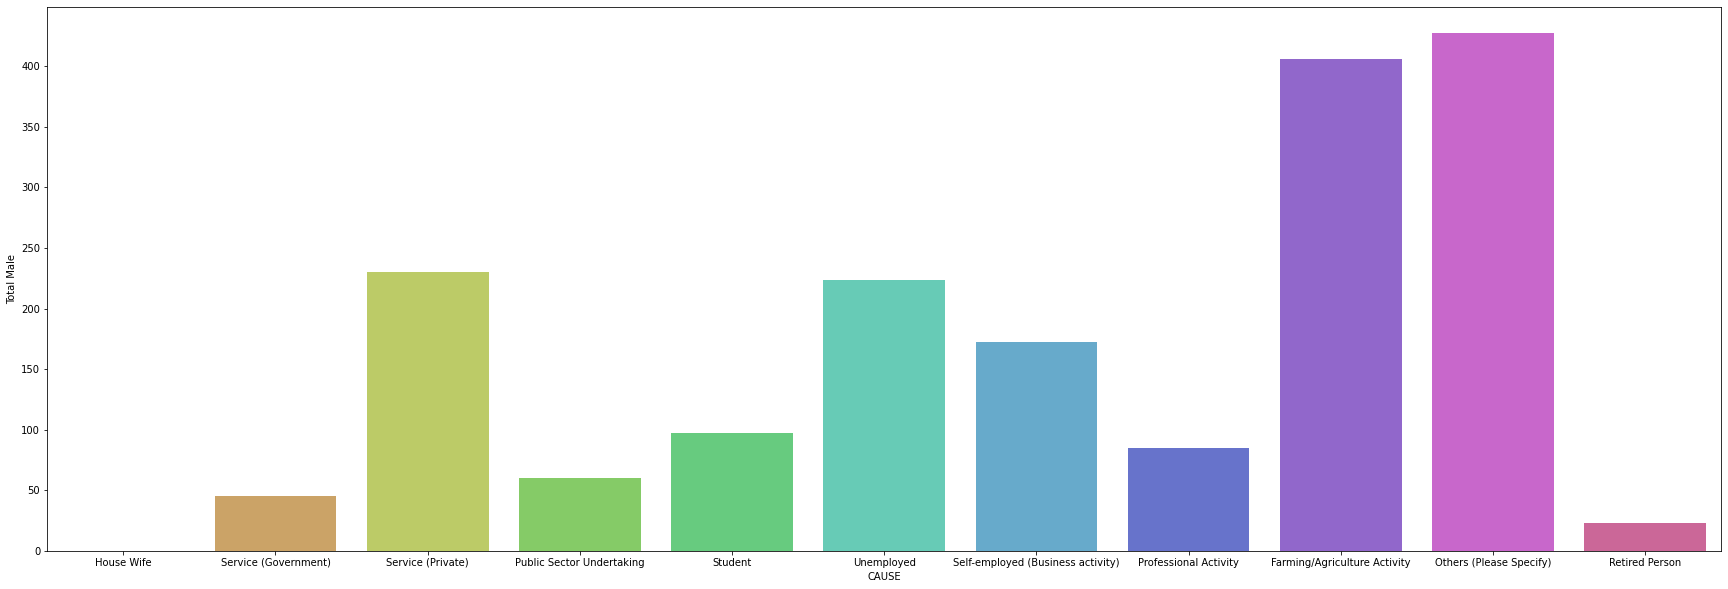

In [ ]:
#Visualizing total males in each cause using barplot
fig, ax = plt.subplots(figsize=(30, 10))
sns.barplot(x = "CAUSE", y = "Total Male",palette = 'hls',ax=ax, data = totalCleaned,ci = None)

**Therefore bar plot shows that under number of "Total Males" the cause has much higher rate in Others and Farming/agriculture activity and least in Retired person and null in house wife.**

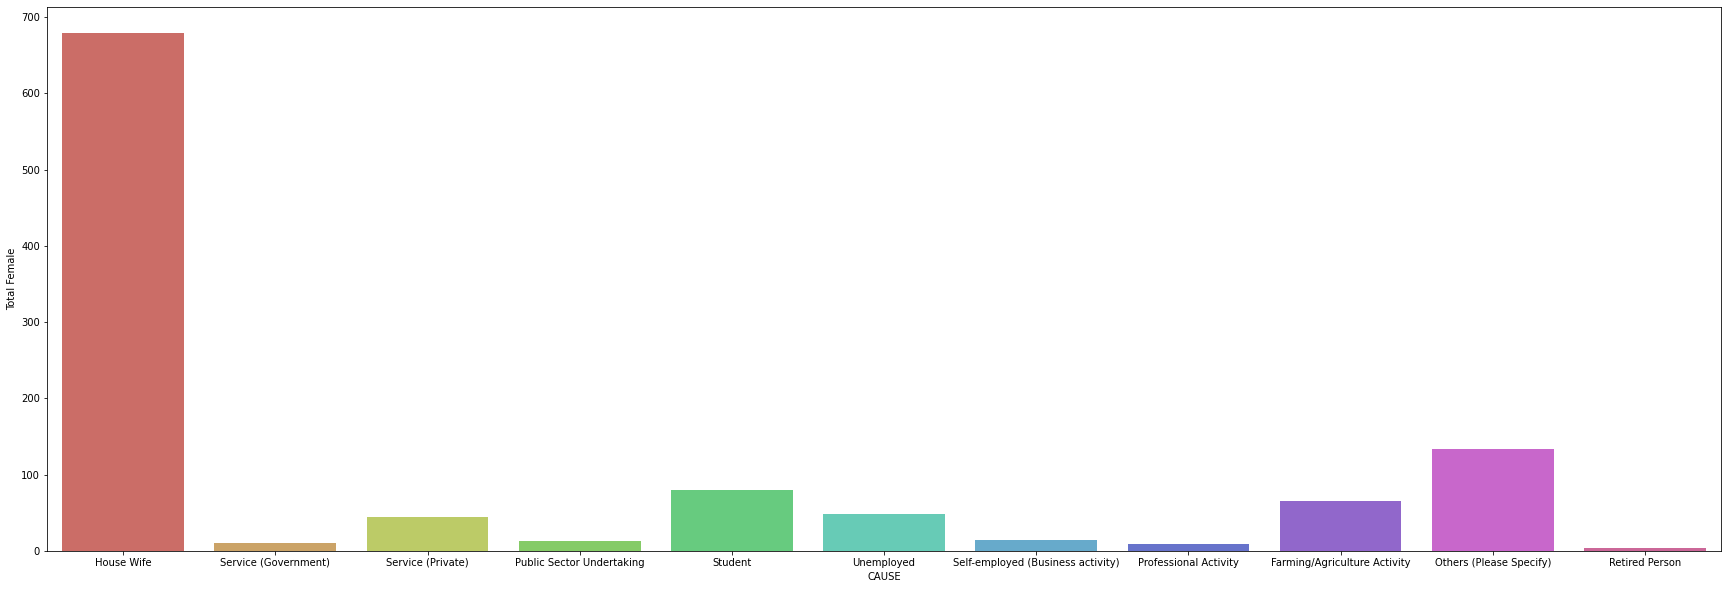

In [ ]:
#Visualizing total females in each cause using barplot
fig, ax = plt.subplots(figsize=(30, 10))
sns.barplot(x = "CAUSE", y = "Total Female",palette = 'hls',ax=ax, data = totalCleaned,ci = None)

**Therefore by using bar graph it shows that under number of "Total Females" the cause has much higher rate in house wife and lower rate in Retired person**

In [ ]:
print("Total cases from 2001-12: \n",totalCleaned.groupby("Year")["Grand Total"].sum())

Total cases from 2001-12: 
 Year
2001    108506
2002    110417
2003    110851
2004    113697
2005    113914
2006    118112
2007    122637
2008    125017
2009    127151
2010    134599
2011    135585
2012    120488
Name: Grand Total, dtype: int64


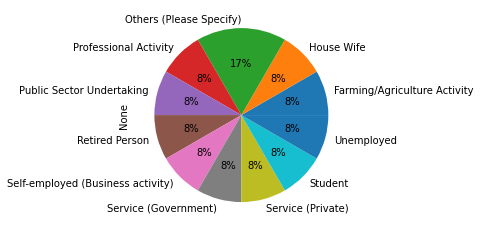

In [ ]:

totalCleaned.groupby('CAUSE').size().plot(kind='pie', autopct='%1.0f%%')

**This Pie chart shows the percentage in total by cause-wise where every cause has equal rate/percentage of 8% and under others its 18% which is the highest rate.**

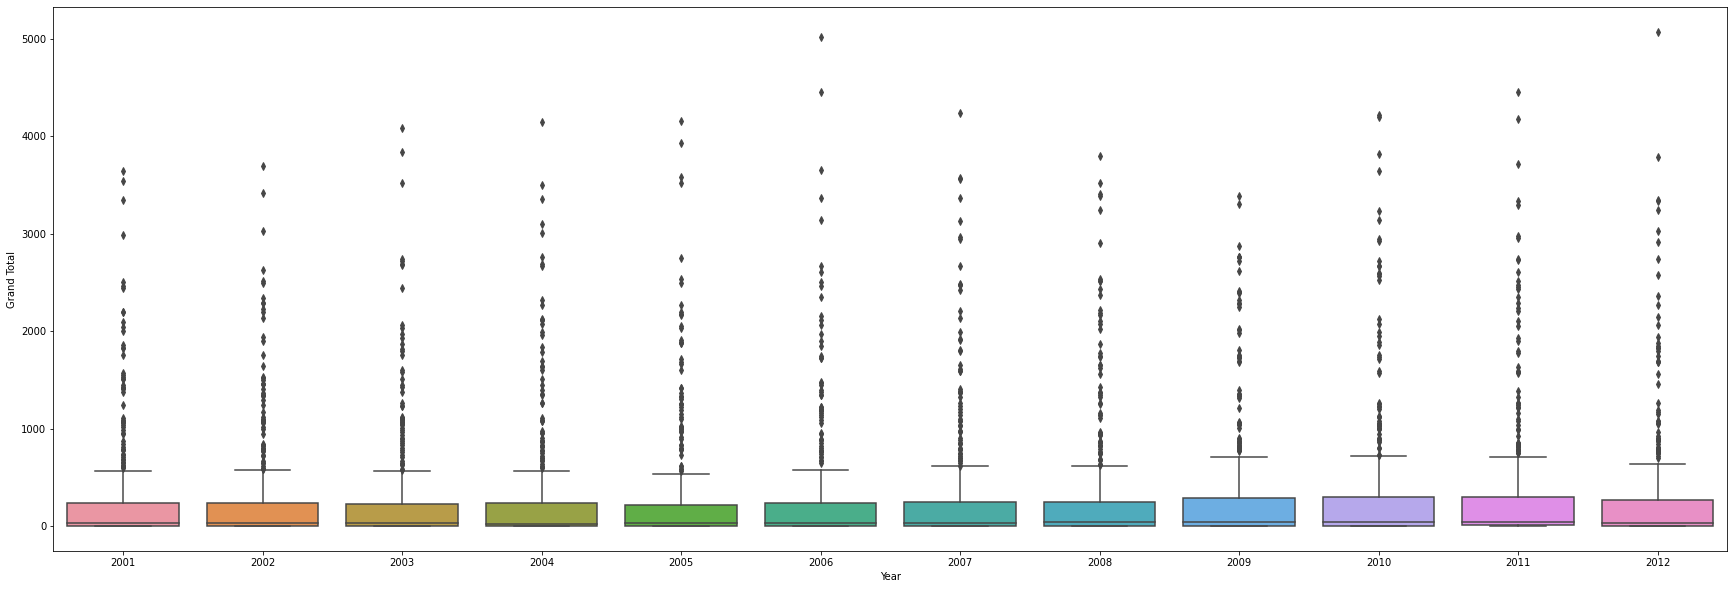

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.boxplot(x='Year',y='Grand Total',data=totalCleaned)

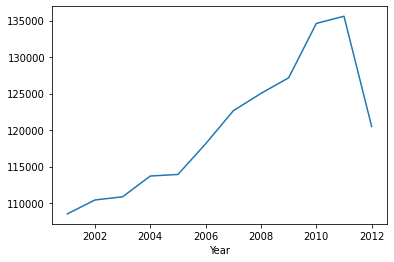

In [ ]:
#Visualizing Total from 2001 to 2012 using line plot
totalCleaned.groupby("Year")["Grand Total"].sum().plot(kind="line")

**by using line plot we can see that there is a continuous increase from 2001 to 2011 and sudden drop down in 2012**

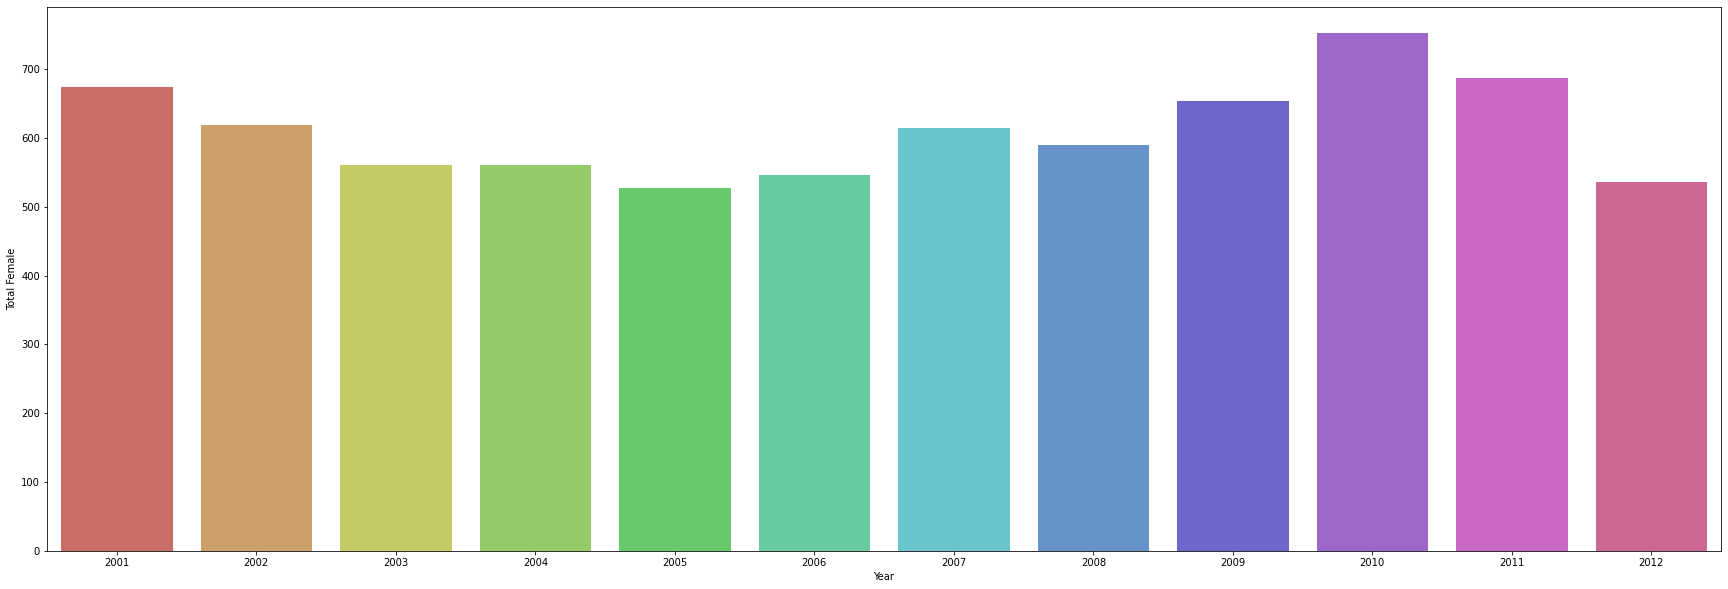

In [ ]:
#Visualizing total Selfemployed women in each year
fig, ax = plt.subplots(figsize=(30, 10))
sns.barplot(x = "Year", y = "Total Female",palette = 'hls',ax=ax, data =TotalSelfEmployed,ci = None)

**This bar plot shows the self employed womens are more in 2010 and least in 2012**

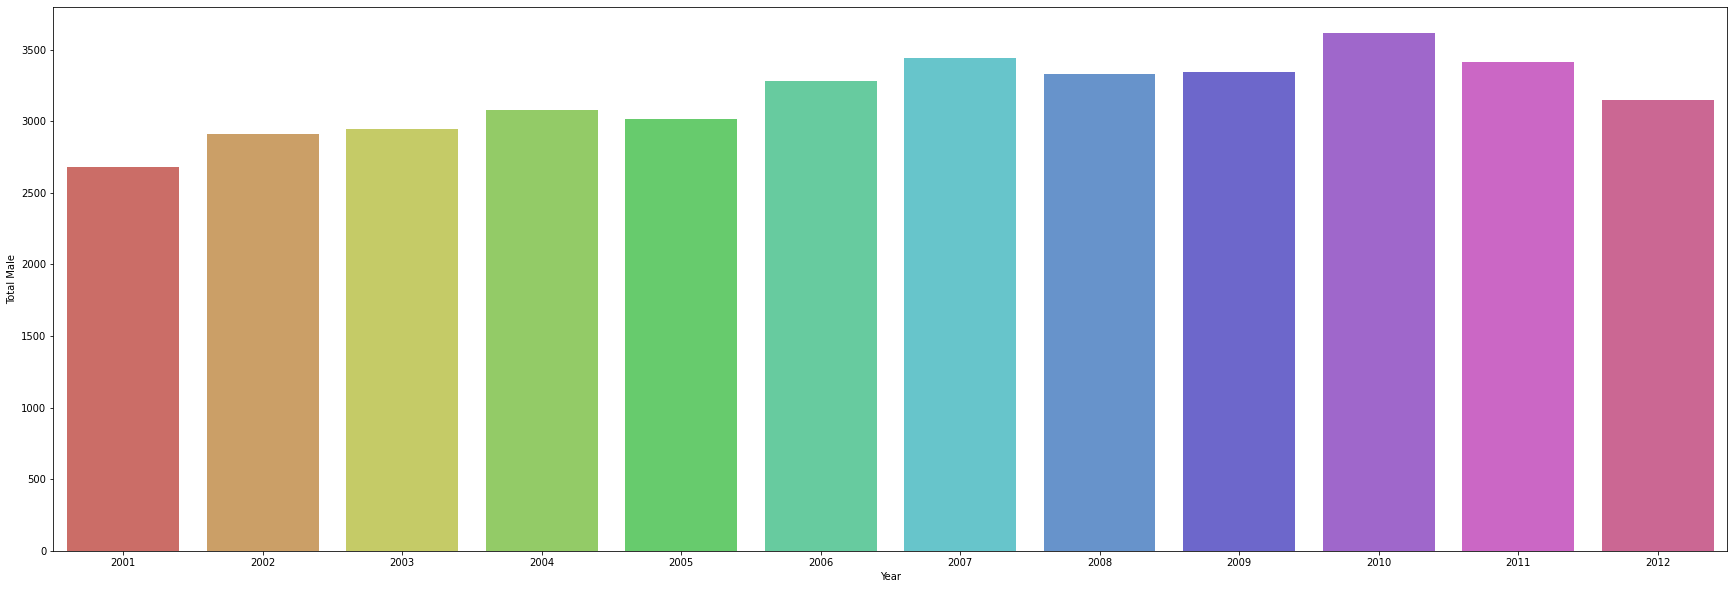

In [ ]:
#Visualizing total Selfemployed women in each year
fig, ax = plt.subplots(figsize=(30, 10))
sns.barplot(x = "Year", y = "Total Male",palette = 'hls',ax=ax, data =TotalSelfEmployed,ci = None)


**The Bar plot shows Total Male suicide in various years**


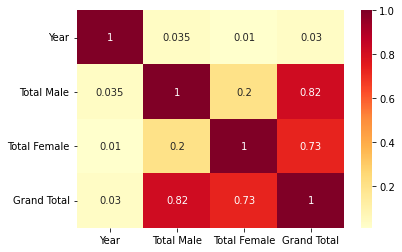

In [ ]:
#plotting the correlation matrix of Year,Total Male,Total Female and Grand Total
sns.heatmap(totalCleaned[['Year','Total Male','Total Female','Grand Total']].corr(), annot=True, cmap = 'YlOrRd')
plt.show()
#spurious hit

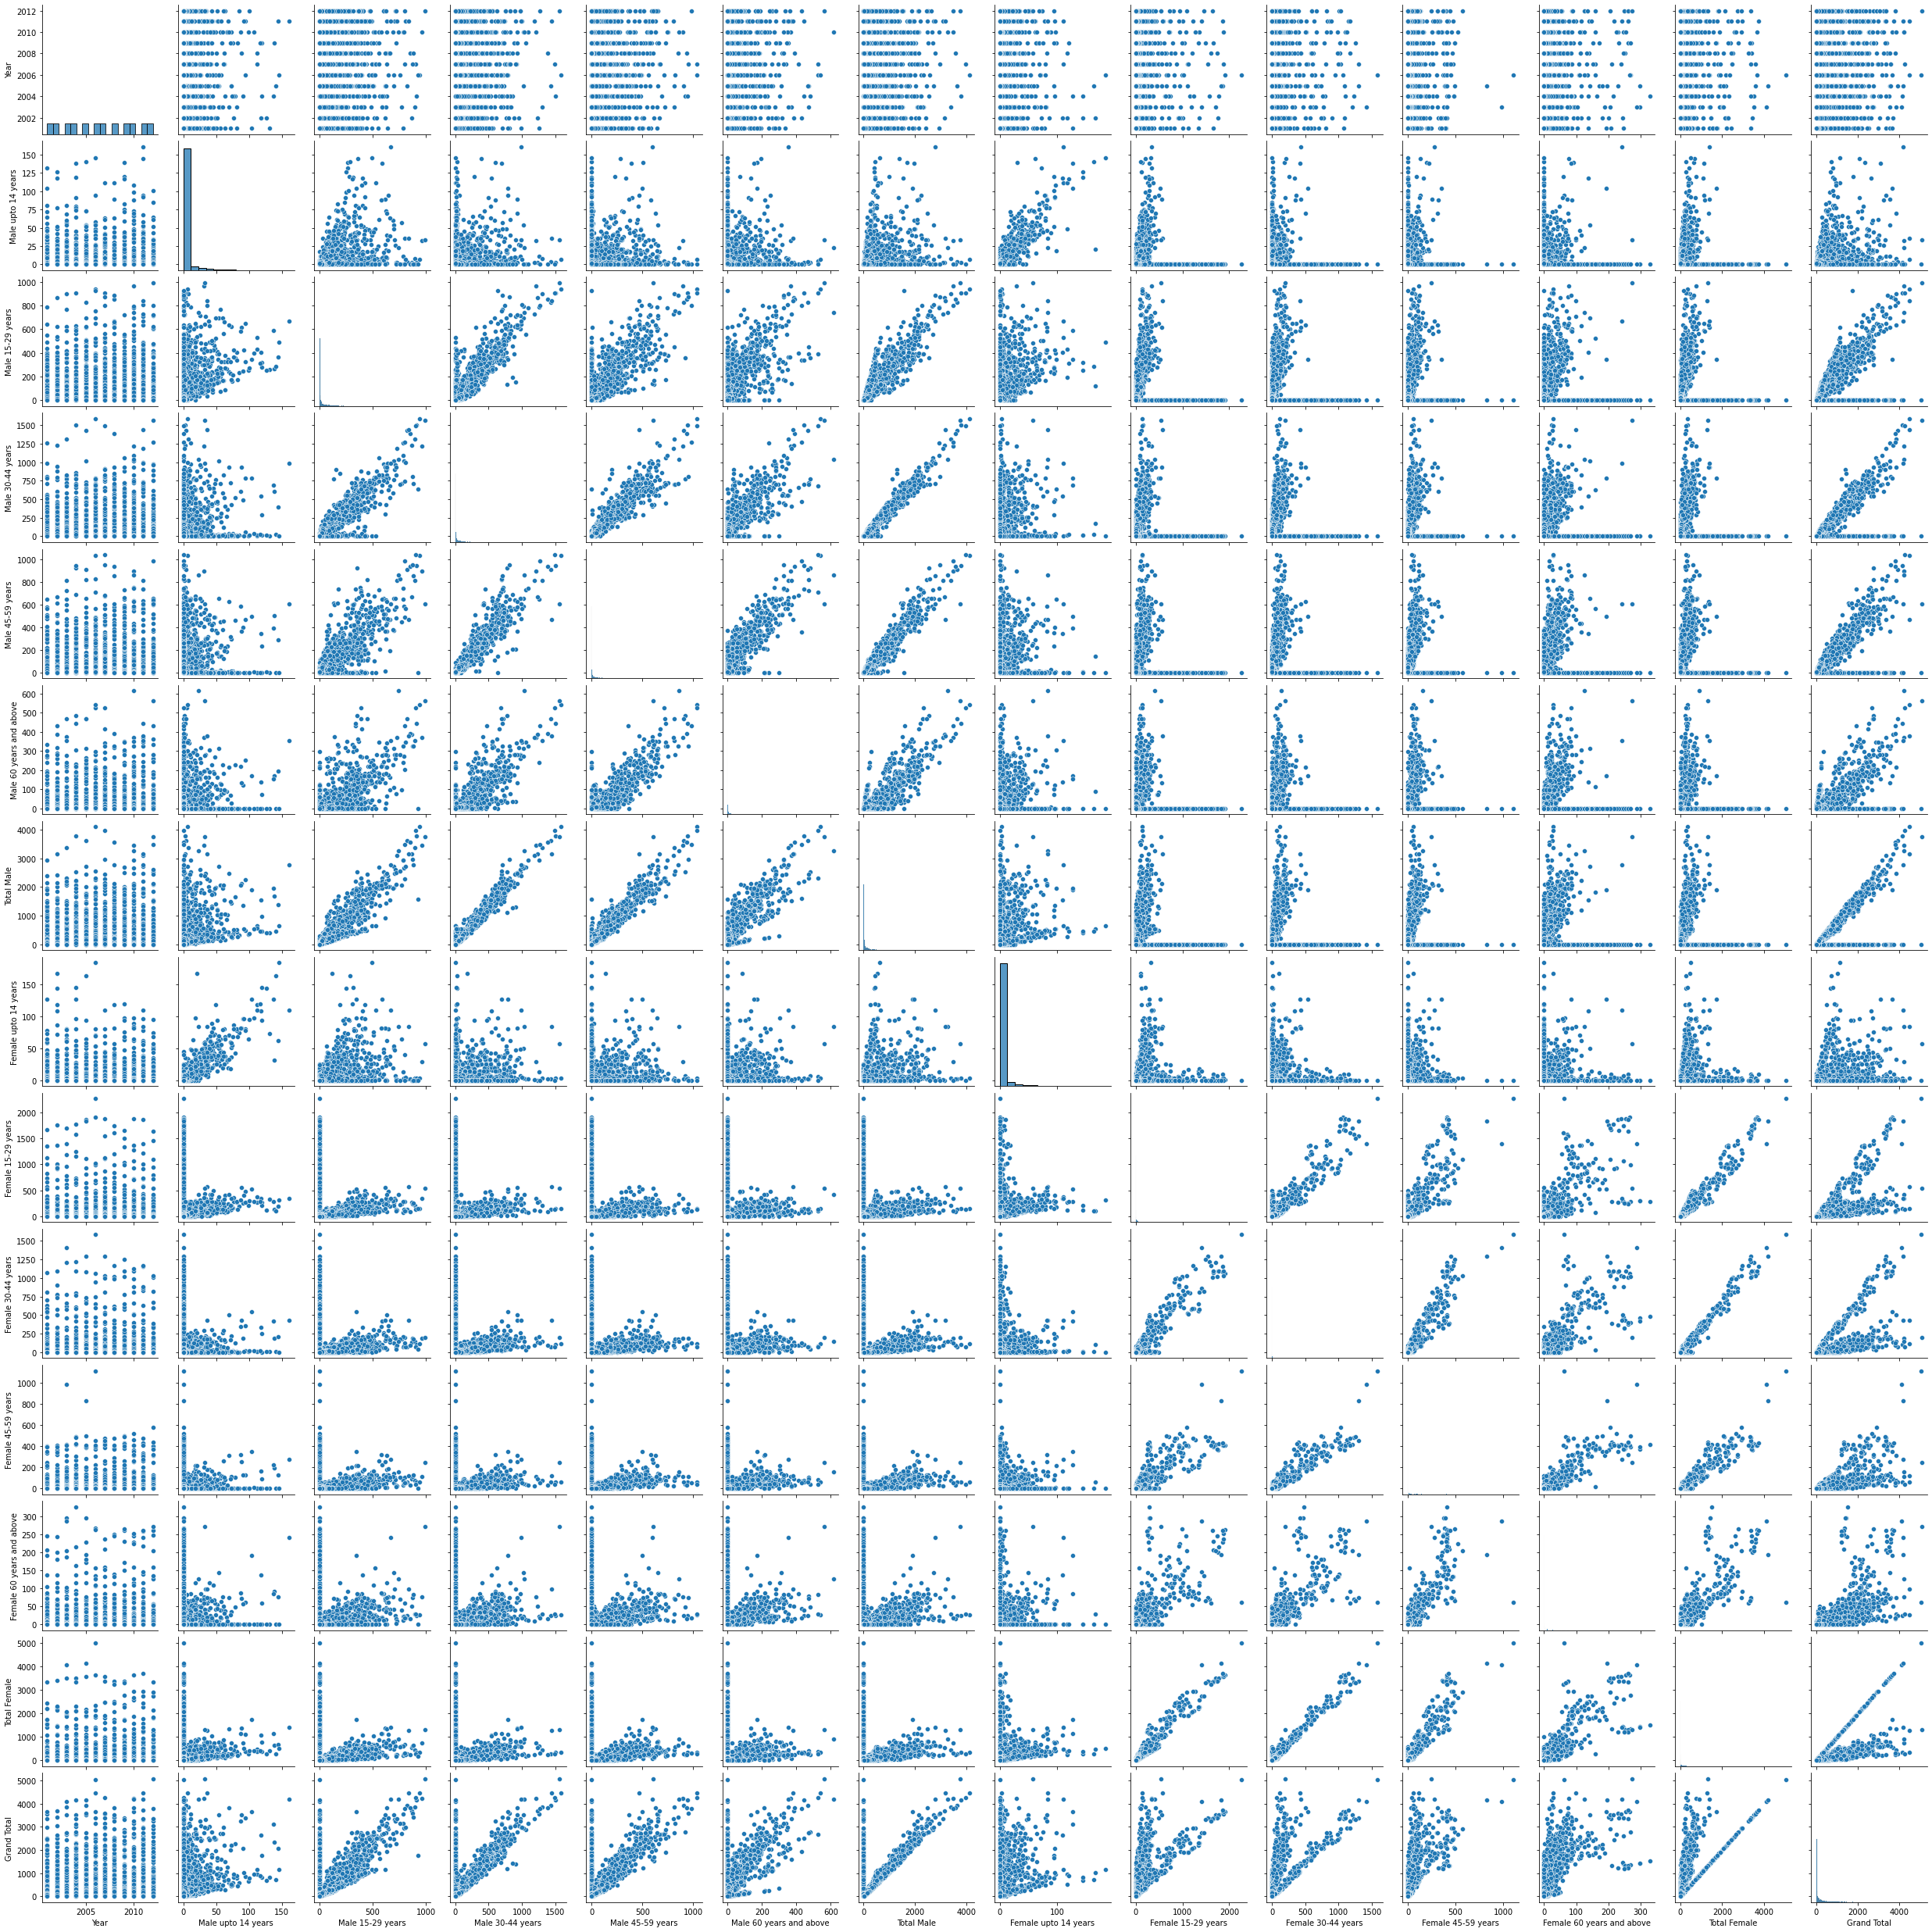

In [ ]:
sns.pairplot(data = totalCleaned)
plt.show()
#plot of all columns
#spurious hit

In [ ]:
totalCleaned.columns

Index(['STATE/UT', 'CAUSE', 'Year', 'Male upto 14 years', 'Male 15-29 years',
       'Male 30-44 years', 'Male 45-59 years', 'Male 60 years and above',
       'Total Male', 'Female upto 14 years', 'Female 15-29 years',
       'Female 30-44 years', 'Female 45-59 years', 'Female 60 years and above',
       'Total Female', 'Grand Total'],
      dtype='object')

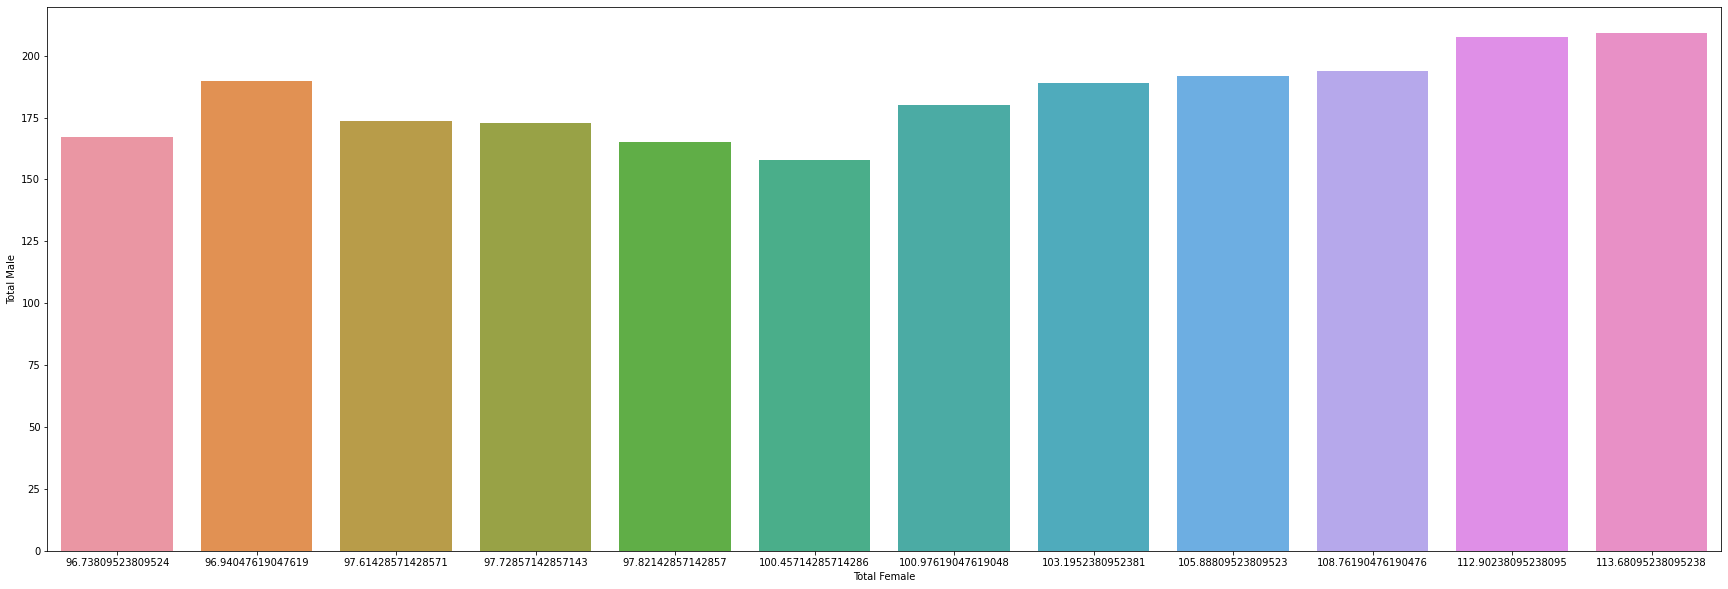

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
df_sample=totalCleaned.groupby("Year").agg("mean")
sns.barplot(x='Total Female',y='Total Male',data=df_sample,ax=ax)
#


**Ploting mean of Total male and Toatal Female after grouping them by year**

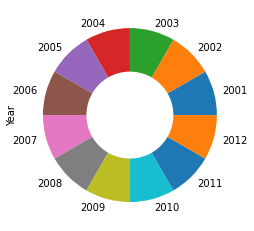

In [ ]:
totalCleaned.Year.value_counts().plot.pie().add_artist(plt.Circle((0, 0), 0.50, fc='white'))
plt.show()
#

**Doughnut plot based on years**

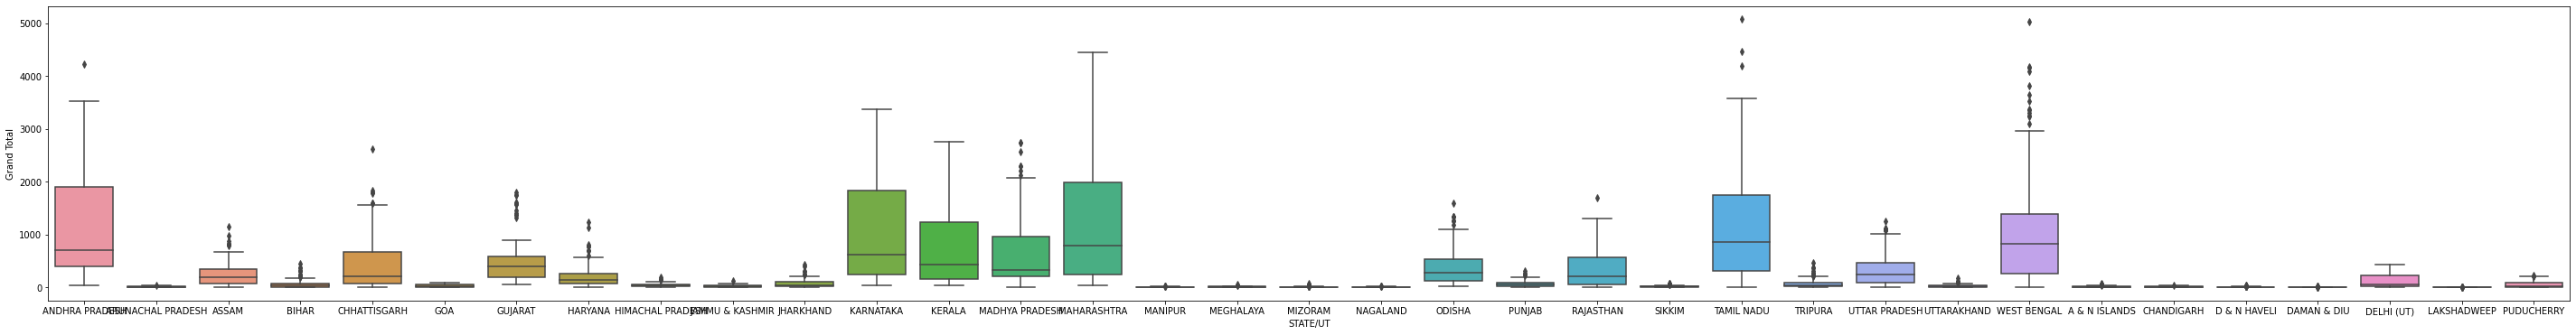

In [ ]:
fig, ax = plt.subplots(figsize=(50, 6))
sns.boxplot(y='Grand Total',x='STATE/UT',ax=ax,data=totalCleaned)
#

**Box plot on Grand total and State/UT**

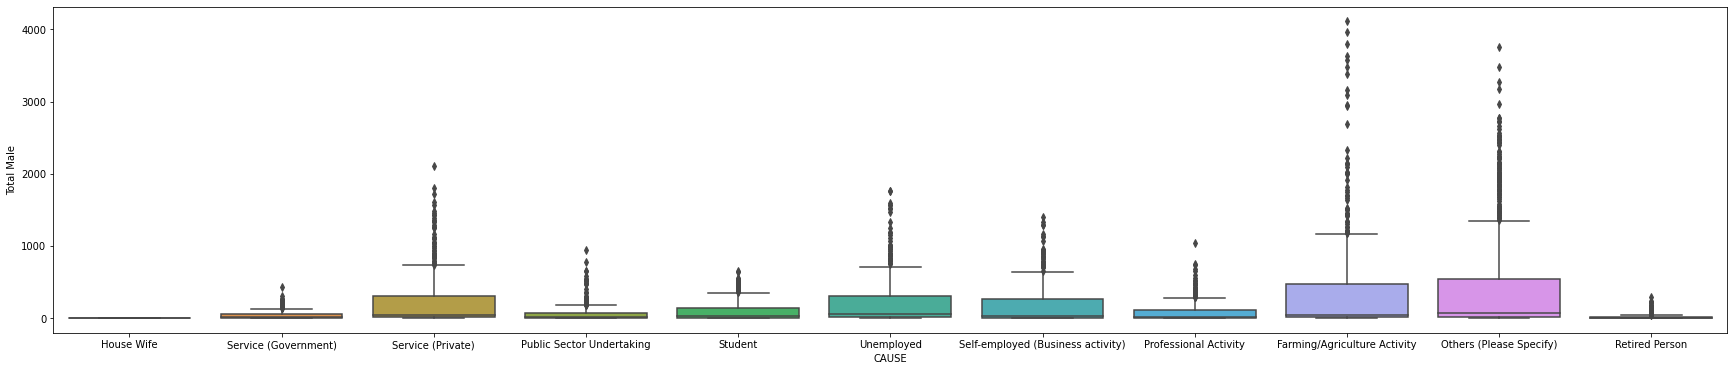

In [ ]:
fig, ax = plt.subplots(figsize=(30, 6))
sns.boxplot(y='Total Male',x='CAUSE',data=totalCleaned)
#

**Ploting the cause of total male**

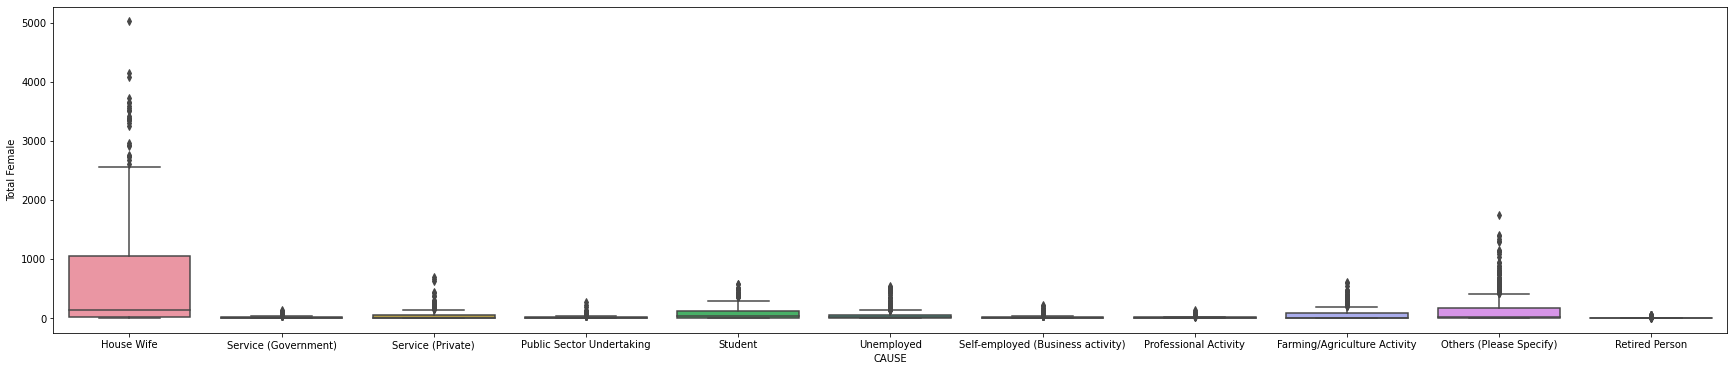

In [ ]:
fig, ax = plt.subplots(figsize=(30, 6))
sns.boxplot(y='Total Female',x='CAUSE',data=totalCleaned)
#

**Ploting the cause of total Female**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


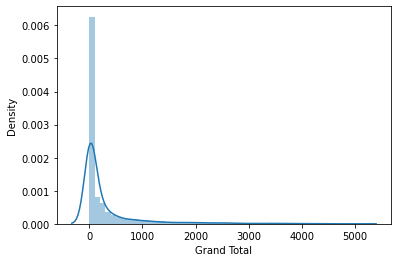

In [ ]:
sns.distplot(totalCleaned["Grand Total"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


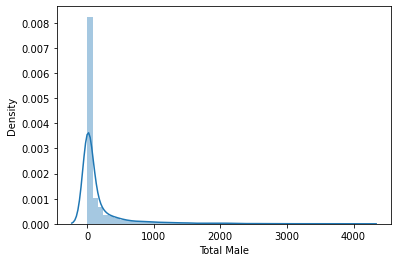

In [ ]:
sns.distplot(totalCleaned["Total Male"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


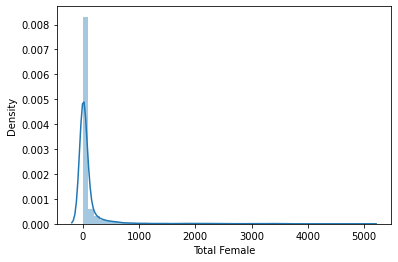

In [ ]:
sns.distplot(totalCleaned["Total Female"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


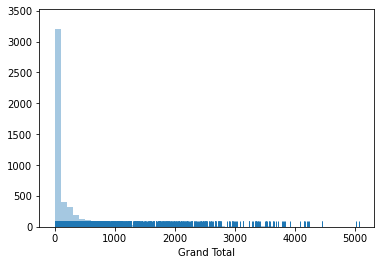

In [ ]:
sns.distplot(totalCleaned["Grand Total"], kde=False, rug=True);


ScatterPlot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


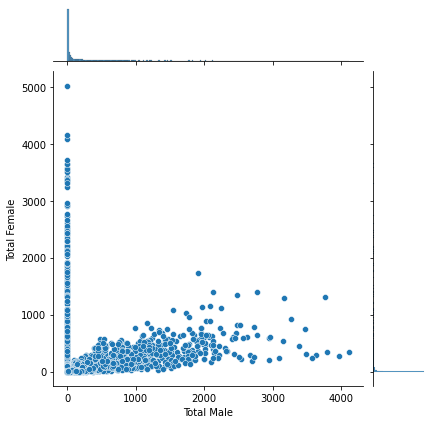

In [ ]:
sns.jointplot(totalCleaned["Total Male"], totalCleaned["Total Female"])

Kernel Density Estimation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


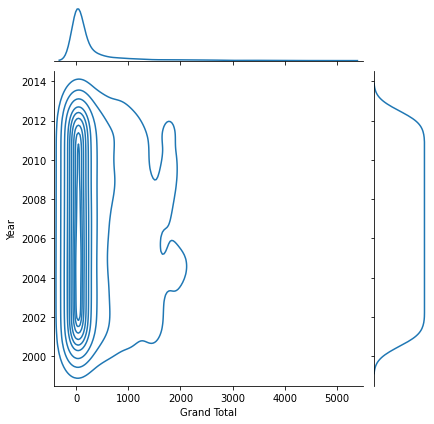

In [ ]:
sns.jointplot(totalCleaned['Grand Total'], totalCleaned['Year'], kind="kde")
# kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable.

In [ ]:
# sns.pairplot(totalCleaned[['CAUSE', 'Total Male', 'Total Female']])

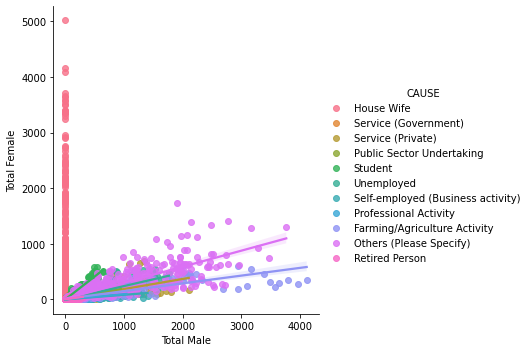

In [ ]:
sns.lmplot(x="Total Male", y="Total Female",hue="CAUSE", data=totalCleaned)

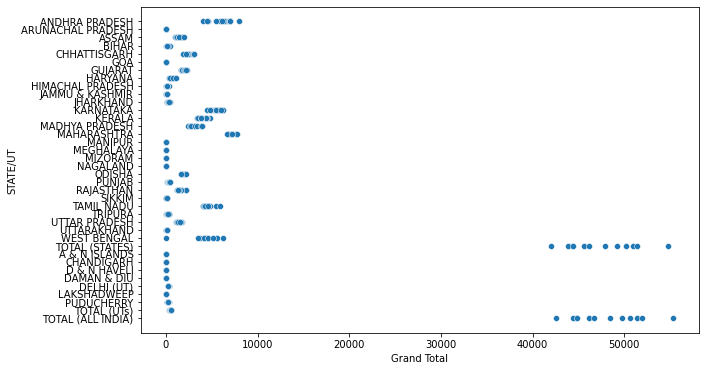

In [ ]:
#ploting the self employed people who suicided in each state
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=TotalSelfEmployed["Grand Total"],y=TotalSelfEmployed['STATE/UT'])

In [ ]:
TotalSelfEmployed["CAUSE"].value_counts()

Total Self-employed    456
Name: CAUSE, dtype: int64

In [ ]:
TotalSelfEmployed.value_counts()

STATE/UT           CAUSE                    Year  Male upto 14 years  Male 15-29 years  Male 30-44 years  Male 45-59 years  Male 60 years and above  Total Male  Female upto 14 years  Female 15-29 years  Female 30-44 years  Female 45-59 years  Female 60 years and above  Total Female  Grand Total
ARUNACHAL PRADESH  Others (Please Specify)  2003  0                   0                 0                 0                 0                        0           0                     0                   0                   0                   0                          0             0              2
LAKSHADWEEP        Others (Please Specify)  2008  0                   0                 0                 0                 0                        0           0                     0                   0                   0                   0                          0             0              2
NAGALAND           Others (Please Specify)  2010  0                   0                 0             

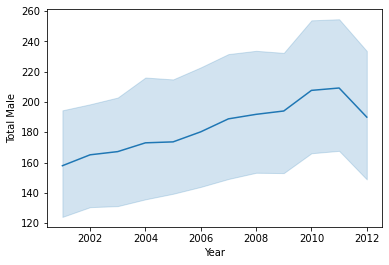

In [ ]:
sns.lineplot(x=TotalSelfEmployed['Year'],y=TotalSelfEmployed['Total Male'])

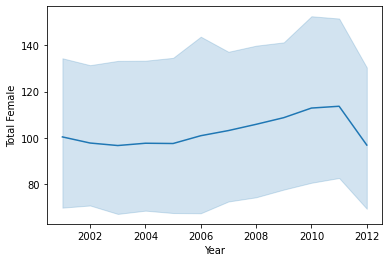

In [ ]:
sns.lineplot(x=TotalSelfEmployed['Year'],y=TotalSelfEmployed['Total Female'])

**Conclusion**<br>
 "Total Males" the cause has much higher rate in Others and Farming/agriculture activity and least in Retired person and null in house wife.
 there is a continuous increase from 2001 to 2011 and sudden drop down in 2012
  self employed womens are more in 2010 and least in 2012. The postive trend during 2007-2008 can be due to Global Ecomnomic crisis . Andra Pradesh has been the state with most number of Suicides.

